# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [12]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

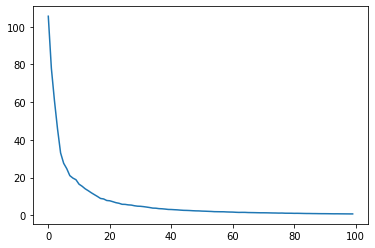

In [13]:
# Samples corresponding to the last digit of your roll number (plot a)
from numpy import linalg as LA
my_roll_data = []
myroll_last=3
for i in range(train_data.shape[0]):
    if(train_labels[i]==myroll_last):
        my_roll_data.append(train_data[i])
my_roll_data = np.array(my_roll_data)
# print(my_roll_data.shape[0])
my_cov_mat = np.cov(my_roll_data.T)
eigvals = LA.eigvals(my_cov_mat)
eigmean = np.mean(eigvals)
# print(eigmean)
normalise_eig_vals = eigvals/eigmean
plt.plot(range(0,100),normalise_eig_vals[0:100])
plt.show()

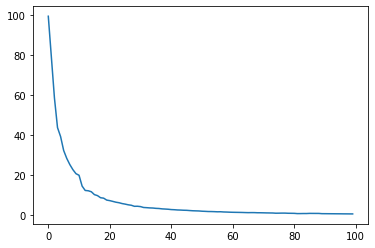

In [14]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
myroll_last += 1
myroll_last = myroll_last%10
my_roll_data = []
for i in range(train_data.shape[0]):
    if(train_labels[i]==myroll_last):
        my_roll_data.append(train_data[i])
my_roll_data = np.array(my_roll_data)
# print(my_roll_data.shape[0])
my_cov_mat = np.cov(my_roll_data.T)
eigvals = LA.eigvals(my_cov_mat)
eigmean = np.mean(eigvals)
# print(eigmean)
normalise_eig_vals = eigvals/eigmean
plt.plot(range(0,100),normalise_eig_vals[0:100])
plt.show()

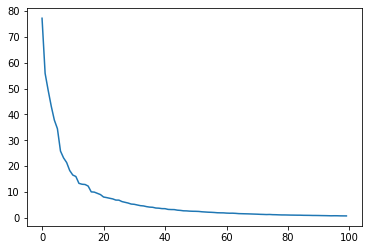

In [15]:
# All training data (plot c)
my_cov_mat = np.cov(train_data.T)
eigvals = LA.eigvals(my_cov_mat)
eigmean = np.mean(eigvals)
# print(eigmean)
normalise_eig_vals = eigvals/eigmean
plt.plot(range(0,100),normalise_eig_vals[0:100])
plt.show()

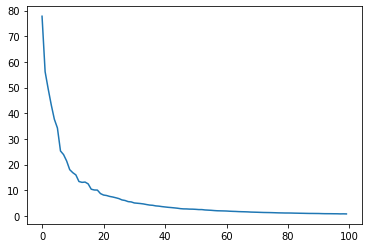

In [16]:
# Randomly selected 50% of the training data (plot d)
sample_size = int(train_data.shape[0])
sample_size = int(sample_size/2)
random_train = train_data[np.random.choice(train_data.shape[0],sample_size, replace=False)]
# print(random_train.shape)
my_cov_mat = np.cov(random_train.T)
eigvals = LA.eigvals(my_cov_mat)
eigmean = np.mean(eigvals)
# print(eigmean)
normalise_eig_vals = eigvals/eigmean
plt.plot(range(0,100),normalise_eig_vals[0:100])
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
### Answer 1
#### part 1)
1. The plots of a and b are looking same as most of information of the covariance matrix are stored in the larger eigen values.
2. As a result we see that the graph is in the shape of a hyperbola, but there are minor variations.The eigenvalues of the covariance matrix of 4 (in graph b) have higher values and also has a larger quantity of greater eigen values.

#### Part-2
1. As the eigen spectrum of part c has the eigen values of the entire data, hence the spread of the eigen spectrum is greater than as compared to that in part b.

#### Part-3
1. We can find the approximate rank of each plot by finding the point where the graph almost tends to $0$.
    - $\approx$ 70 for plot a.
    - $\approx$ 70 for plot b.
    - $\approx$ 90 for plot c.
    - $\approx$ 90 for plot d.
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
- Possible images = 2**784
- percentage available = 7000/(2**784)x100
- If we had access to all the data the eigen value spectrum would have been a straight line parralel to x-axis.
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
### Answer
The eigen-value spectrum will not change as we can see

\begin{equation}
    \Sigma = \frac{1}{N} \sum_{i=1}^{N}(x-\mu)(x-\mu)^{T}
\end{equation}

We multiply $x$ with $A$ such that $AA^{T} = I$. Let,

\begin{equation}
    \Sigma^{'} = \frac{1}{N} \sum_{i=1}^{N}(Ax-\mu)(Ax-\mu)^{T}
    {} = \frac{1}{N} \sum_{i=1}^{N}A(x-\mu)(x-\mu)^{T}A^{T}
    {} = A \Sigma A^{T}
\end{equation}

Since $\Sigma^{'}$ and $\Sigma$ are similar therefore the eigen values will be same.

---

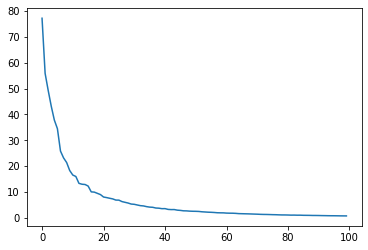

In [17]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.
# code goes here
trans_mat = np.random.rand(784,784)
Q,R = LA.qr(trans_mat)
trans_train = np.matmul(train_data,Q)
my_cov_mat = np.cov(trans_train.T)
eigvals = LA.eigvals(my_cov_mat)
eigmean = np.mean(eigvals)
# print(eigmean)
normalise_eig_vals = eigvals/eigmean
plt.plot(range(0,100),normalise_eig_vals[0:100])
plt.show()

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
- If we multiply our matrix with a matrix of rank 1 or 2 then, it will lead to loss of eigen values and the resultant number of eigen values will be at max 2. 
- Hence, the eigen value spectrum will be 0 for most of the part.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

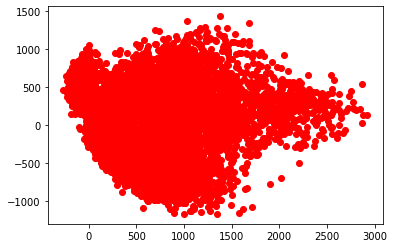

In [18]:
# Plotting code here
my_cov_mat = np.cov(train_data.T)

eigvals, eigvects = np.linalg.eig(my_cov_mat)
dim1 = []
dim2 = []
# print(eigvects.shape)
topeigvecs = [eigvects[:,0],eigvects[:,1]]
topeigvecs = np.array(topeigvecs)
topeigvecs = topeigvecs.T
# print(topeigvecs.shape)
res_mat = np.matmul(train_data,topeigvecs)
dim1 = res_mat[:,0]
dim2 = res_mat[:,1]
plt.scatter(dim1,dim2,c='r')
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [19]:
# Print accuracy on the test set using MLE
def mahalnobis_dist(data,inv,mean):
    dist = np.dot((data-mean).T,inv)
    dist = np.dot(dist,(data-mean))
    return dist
label_data = []
for j in range(0,10):
    templist = []
    for i in range(0,train_data.shape[0]):
        if(int(train_labels[i])==j): 
            templist.append(train_data[i])
    templist = np.array(templist)
    label_data.append(templist)
label_data = np.array(label_data)
# print(label_data.shape)
means =[]
invs = []
for i in range(0,10):
    means.append(np.mean(label_data[i],axis=0))
    invs.append(np.linalg.pinv(np.cov(label_data[i].T)))
means = np.array(means)
invs = np.array(invs)
accuracy = 0
for i in range(0,test_data.shape[0]):
    check_distances  = []
    for j in range(0,10):
        cur_dist = mahalnobis_dist(test_data[i],invs[j],means[j])
        check_distances.append(cur_dist)
    pos = check_distances.index(min(check_distances))
    if(pos==int(test_labels[i])):
        accuracy+=1
print("Accuracy is ",accuracy/10,"%")

Accuracy is  74.4 %


In [20]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)


# We can assume that samples are uniformly distributed across samples so a sample has equal probability 1/10 to fall in a class
prob = 1/10
# So all what will change is the mahalnobis function where will multiply the result with our priori probability assumption
def mahalnobis_dist(data,inv,mean):
    dist = np.dot((data-mean).T,inv)
    dist = np.dot(dist,(data-mean))
    return dist*prob
label_data = []
for j in range(0,10):
    templist = []
    for i in range(0,train_data.shape[0]):
        if(int(train_labels[i])==j): 
            templist.append(train_data[i])
    templist = np.array(templist)
    label_data.append(templist)
label_data = np.array(label_data)
# print(label_data.shape)
means =[]
invs = []
for i in range(0,10):
    means.append(np.mean(label_data[i],axis=0))
    invs.append(np.linalg.pinv(np.cov(label_data[i].T)))
means = np.array(means)
invs = np.array(invs)
accuracy = 0
for i in range(0,test_data.shape[0]):
    check_distances  = []
    for j in range(0,10):
        cur_dist = mahalnobis_dist(test_data[i],invs[j],means[j])
        check_distances.append(cur_dist)
    pos = check_distances.index(min(check_distances))
    if(pos==int(test_labels[i])):
        accuracy+=1
print("Accuracy is ",accuracy/10,"%")

Accuracy is  74.4 %


In [21]:
# Print accuracy using Bayesian pairwise majority voting method
def mahalnobis_dist(data,inv,mean):
    dist = np.dot((data-mean).T,inv)
    dist = np.dot(dist,(data-mean))
    return dist
label_data = []
for j in range(0,10):
    templist = []
    for i in range(0,train_data.shape[0]):
        if(int(train_labels[i])==j): 
            templist.append(train_data[i])
    templist = np.array(templist)
    label_data.append(templist)
label_data = np.array(label_data)
# print(label_data.shape)
means =[]
invs = []
convs = []
for i in range(0,10):
    means.append(np.mean(label_data[i],axis=0))
    convs.append((np.cov(label_data[i].T)))
means = np.array(means)
convs = np.array(convs)
invs = []
for i in range(0,10):
    templist = []
    for j in range(0,10):
        if i==j:
            templist.append(np.identity(784))
        elif i!=j:
            avg_conv = convs[i]+convs[j]
            avg_conv = avg_conv/2
            temp = LA.pinv(avg_conv)
            templist.append(temp)
    invs.append(np.array(templist))
invs = np.array(invs)
# print(invs.shape)
accuracy=0
for k in range(0,test_data.shape[0]):
    votes = [0]*10
    for i in range(0,10):
        for j in range(0,10):
            if i!=j:
                cur_inv = invs[i][j]
                dist1 = mahalnobis_dist(test_data[k],cur_inv,means[i])
                dist2 = mahalnobis_dist(test_data[k],cur_inv,means[j])
                if(dist1<=dist2):
                    votes[i]+=1
                else:
                    votes[j]+=1
    check_label = votes.index(max(votes))
    if(check_label==test_labels[k]):
        accuracy+=1
print("Accuracy is ",accuracy/10,"%")

Accuracy is  83.8 %


In [22]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
def euclid_dist(data,mean):
    dist = LA.norm((data-mean))
    return dist
label_data = []
for j in range(0,10):
    templist = []
    for i in range(0,train_data.shape[0]):
        if(int(train_labels[i])==j): 
            templist.append(train_data[i])
    templist = np.array(templist)
    label_data.append(templist)
label_data = np.array(label_data)
means =[]
invs = []
convs = []
for i in range(0,10):
    means.append(np.mean(label_data[i],axis=0))
    convs.append((np.cov(label_data[i].T)))
means = np.array(means)
convs = np.array(convs)
accuracy=0
for k in range(0,test_data.shape[0]):
    votes = [0]*10
    for i in range(0,10):
        for j in range(0,10):
            if i!=j:
                dist1 = euclid_dist(test_data[k],means[i])
                dist2 = euclid_dist(test_data[k],means[j])
                if(dist1<=dist2):
                    votes[i]+=1
                else:
                    votes[j]+=1
    check_label = votes.index(max(votes))
    if(check_label==test_labels[k]):
        accuracy+=1
print("Accuracy is ",accuracy/10,"%")

Accuracy is  77.0 %


### 1.3.3 Question 4
Compare performances and salient observations

---
- In MAP, I have assumed that the classes occur with uniformly. Hence, we can take the priori probability=1/10 So, we get the accuracy of MAP and MLE as same $74.4\%$.
- The only difference between bayesian pairwise voting method and simple perpendicular bisector majority voting method is that of the distance metric.(Mahalnobis distance for the first and euclid distance for the second as the distance from bisector is basically cardesian or euclid distance).
- In Bayesian pairwise voting method, we assume that the variance of both the distributions are same which is a good enough approximation as the decision boundary is now a line (in place of a quadratic curve),hence accuracy is high(83.8 %).
- Performace of MAP will change if dataset is not uniform (due to our assumptions).Rest will not differ much
---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

Accuracy for k=1 :  90.7 %
Accuracy for k=3 :  91.6 %
Accuracy for k=7 :  91.6 %


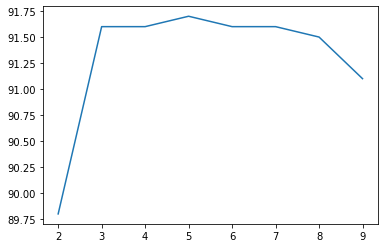

In [23]:
# Your code here
# Print accuracies with K = 1, 3, 7
final_dist_vect = []
def votecount(k,ind):
    count = [0]*10
    for i in range(0,k):
        count[int(final_dist_vect[ind][i][1])]+=1
    pos = count.index(max(count))
    return pos
def myknn(data_point):
    global final_dist_vect
    nearest_neighbours = []
    distance = []
    for i in range(0,6000):
        cur_dist = LA.norm((data_point-train_data[i]))
        distance.append((cur_dist,int(train_labels[i])))
    dist_sorted =  sorted(distance, key=lambda x: x[0])
    final_dist_vect.append(dist_sorted)
    
res_count_1 = 0
res_count_3 = 0
res_count_7 = 0
for j in range(0,1000):
    myknn(test_data[j])
for j in range(0,1000):
    check_label = votecount(1,j)
    if(check_label==int(test_labels[j])):
        res_count_1+=1
for j in range(0,1000):
    check_label = votecount(3,j)
    if(check_label==test_labels[j]):
        res_count_3+=1
for j in range(0,1000):
    check_label = votecount(7,j)
    if(check_label==test_labels[j]):
        res_count_7+=1
print("Accuracy for k=1 : ",res_count_1/10,"%")
print("Accuracy for k=3 : ",res_count_3/10,"%")
print("Accuracy for k=7 : ",res_count_7/10,"%")
plot_set = [0]*10
x_axes = [i for i in range(2,10)]
for k in range(1,10):
    for j in range(0,1000):
        check_label = votecount(k,j)
        if(check_label==test_labels[j]):
            plot_set[k]+=1
plt.plot(x_axes,np.array(plot_set[2:10])/((len(test_data)))*100)

### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
### Answer
- From the above graph, we see that if value of k is small then noise will higher influence on the result whereas a large k will include points from different classes which can influence/deviate our results.
- We will plot a graph for all values of k and then choose optimal k. For example: we see that for k = 5 is optimal.
---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [24]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [25]:
# print(train_data.shape,mixed_data.shape)
my_mixed_data =np.vstack((train_data,mixed_data))
neighbour_count_list = [0]*my_mixed_data.shape[0]
nearest_neighbours = []
mykvalue = 3
def calc_distances(data_point,ind):
    global neighbour_count_list
    distance = []
    for i in range(0,my_mixed_data.shape[0]):
        cur_dist = LA.norm((data_point-my_mixed_data[i]))
        distance.append((cur_dist,i))
    dist_sorted =  sorted(distance, key=lambda x: x[0])
    for j in range(0,mykvalue):
        neighbour_count_list[dist_sorted[j][1]]+=1
for i in range(0,train_data.shape[0]):
    calc_distances(my_mixed_data[i],i)
ct = 0
print("The Outliers outliers.csv are : ")
for i in range(0,my_mixed_data.shape[0]):
    if(neighbour_count_list[i]==0):
        print(i)

The Outliers outliers.csv are : 
6000
6002
6004
6005
6006
6007
6009
6011
6018


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
- Here we run knn algorithm and select the k nearest neighbours.
- Then we give these neighbours weight according to their distance from test sample (inverse of distance)
- Then we calculate the average neatness score of our test sample in accordance to the weights and labels of its neighbours.
- Then we sum over the absolute difference of actual neatness and predicted neatness which gives us error
---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [26]:
# Your code here
final_dist_vect = []
def errorcount(k,ind):
    toplabels = (final_dist_vect[ind][:k,1])/10
    topdistances = final_dist_vect[ind][:k,0]
    weights = np.reciprocal(topdistances)
    avg_label = np.dot(toplabels,weights)/np.sum(weights)
    return avg_label
def myknn(data_point):
    global final_dist_vect
    nearest_neighbours = []
    distance = []
    for i in range(0,6000):
        cur_dist = LA.norm((data_point-train_data[i]))
        distance.append((cur_dist,int(train_labels[i])))
    dist_sorted =  sorted(distance, key=lambda x: x[0])
    final_dist_vect.append(dist_sorted)
for j in range(0,1000):
    myknn(test_data[j])
final_dist_vect = np.array(final_dist_vect)
Error = [0]*3
for j in range(0,1000):
    check_label = errorcount(1,j)
    Error[0] += np.absolute(check_label-(test_labels[j]/10))
for j in range(0,1000):
    check_label = errorcount(3,j)
    Error[1] += np.absolute(check_label-(test_labels[j]/10))
for j in range(0,1000):
    check_label = errorcount(7,j)
    Error[2] += np.absolute(check_label-(test_labels[j]/10))
fract = test_data.shape[0]/100
print("Accuracy for k=1",Error[0]/fract,"%")
print("Accuracy for k=3",Error[1]/fract,"%")
print("Accuracy for k=7",Error[2]/fract,"%")

Accuracy for k=1 3.540000000000002 %
Accuracy for k=3 3.7441675837369894 %
Accuracy for k=7 4.318909602275967 %


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---